In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from math import sqrt

In [2]:
data = pd.read_csv('BNB2019-2024.csv')
close_prices = data['Close']

In [3]:
# Chia dữ liệu thành tập train và test theo tỉ lệ 8:2
train_size = int(len(close_prices) * 0.8)
train, test = close_prices[:train_size], close_prices[train_size:]

In [4]:
# Xây dựng mô hình Holt-Winters trên tập train
model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=365).fit()

In [5]:
# Dự báo cho tập test
predict_test = model.predict(start=test.index[0], end=test.index[-1])
print(predict_test)

1452    286.956107
1453    292.277807
1454    290.428629
1455    276.129842
1456    282.237884
           ...    
1810    259.175224
1811    261.659336
1812    272.783605
1813    269.348936
1814    274.727206
Length: 363, dtype: float64


In [6]:
# Tính toán RMSE, MAPE, MSE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
rmse_test = sqrt(mean_squared_error(test, predict_test))
mape_test = mean_absolute_percentage_error(test, predict_test)
mse_test = mean_squared_error(test, predict_test)

In [7]:
print("RMSE:", rmse_test)
print("MAPE:", mape_test)
print("MSE:", mse_test)

RMSE: 45.17152936098869
MAPE: 14.586408460722906
MSE: 2040.4670648106637


### Dự báo

#### Dự báo 30 ngày

In [8]:
# Dự báo cho 30 ngày tiếp theo
predict_30_days = model.predict(start=test.index[-1] + 1, end=test.index[-1] + 1 + 30)
print(predict_30_days)

1815    282.899336
1816    316.561443
1817    286.956107
1818    292.277807
1819    290.428629
1820    276.129842
1821    282.237884
1822    280.294018
1823    276.569697
1824    274.065370
1825    281.955530
1826    296.973786
1827    294.052011
1828    293.264787
1829    284.560953
1830    287.255956
1831    285.566246
1832    290.327064
1833    290.175716
1834    306.742514
1835    298.346031
1836    301.404419
1837    293.600050
1838    294.693707
1839    294.959051
1840    292.950636
1841    297.401908
1842    302.332267
1843    302.018314
1844    303.985241
1845    301.785395
dtype: float64


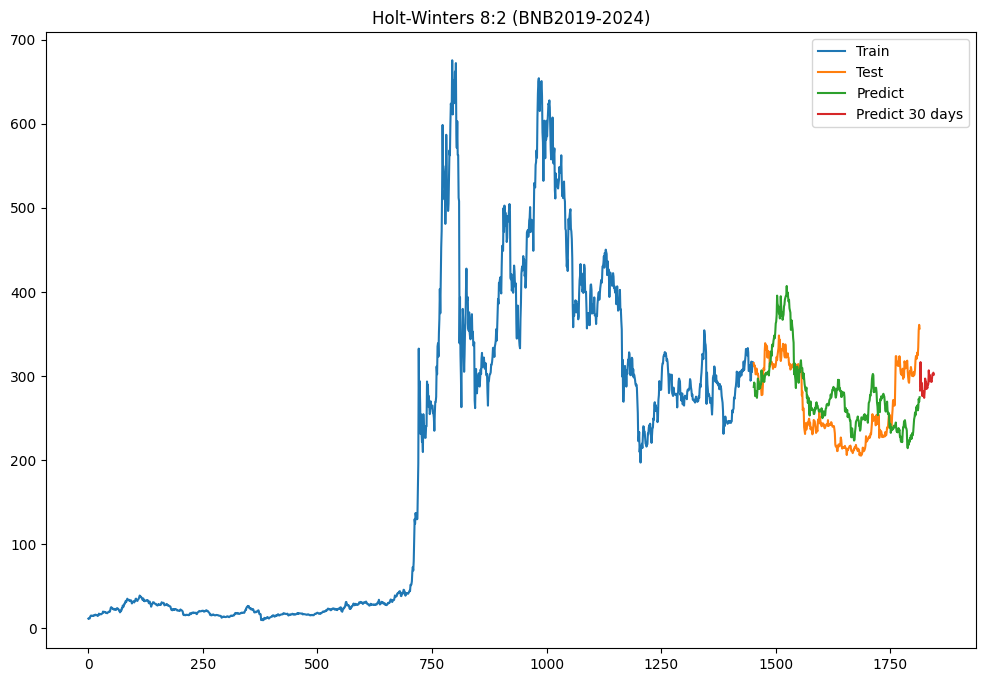

In [9]:
# Trực quan hóa kết quả
plt.figure(figsize=(12, 8))
plt.title('Holt-Winters 8:2 (BNB2019-2024)')
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(predict_test.index, predict_test, label='Predict')
plt.plot(predict_30_days.index, predict_30_days, label='Predict 30 days')
plt.legend(loc='best')
plt.show()

#### Dự báo 60 ngày

In [10]:
# Dự báo cho 60 ngày tiếp theo
predict_60_days = model.predict(start=test.index[-1] + 1, end=test.index[-1] + 1 + 60)
print(predict_60_days)

1815    282.899336
1816    316.561443
1817    286.956107
1818    292.277807
1819    290.428629
           ...    
1871    382.387950
1872    374.396016
1873    375.019893
1874    368.513253
1875    376.032445
Length: 61, dtype: float64


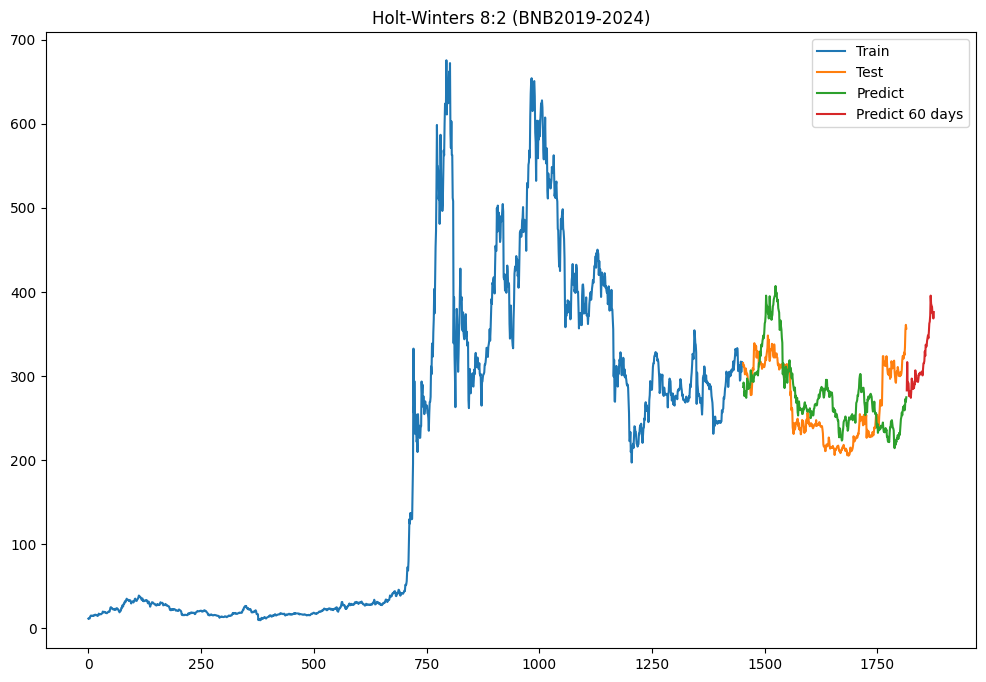

In [11]:
# Trực quan hóa kết quả
plt.figure(figsize=(12, 8))
plt.title('Holt-Winters 8:2 (BNB2019-2024)')
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(predict_test.index, predict_test, label='Predict')
plt.plot(predict_60_days.index, predict_60_days, label='Predict 60 days')
plt.legend(loc='best')
plt.show()

#### Dự báo 90 ngày

In [12]:
# Dự báo cho 60 ngày tiếp theo
predict_90_days = model.predict(start=test.index[-1] + 1, end=test.index[-1] + 1 + 90)
print(predict_90_days)

1815    282.899336
1816    316.561443
1817    286.956107
1818    292.277807
1819    290.428629
           ...    
1901    359.260624
1902    355.285503
1903    345.151146
1904    339.656989
1905    302.148781
Length: 91, dtype: float64


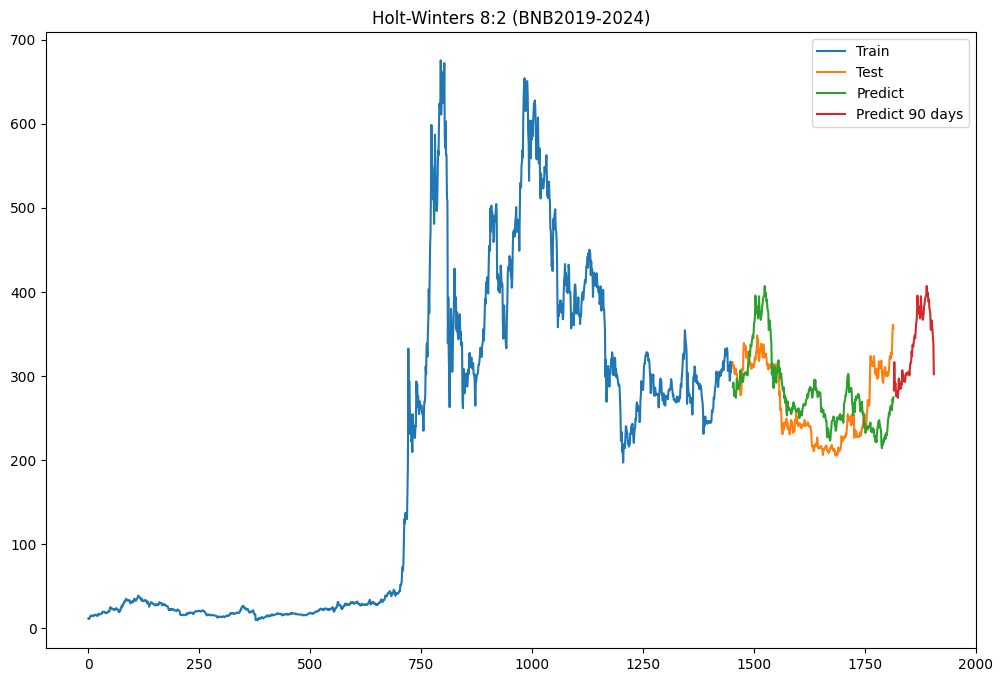

In [13]:
# Trực quan hóa kết quả
plt.figure(figsize=(12, 8))
plt.title('Holt-Winters 8:2 (BNB2019-2024)')
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(predict_test.index, predict_test, label='Predict')
plt.plot(predict_90_days.index, predict_90_days, label='Predict 90 days')
plt.legend(loc='best')
plt.show()

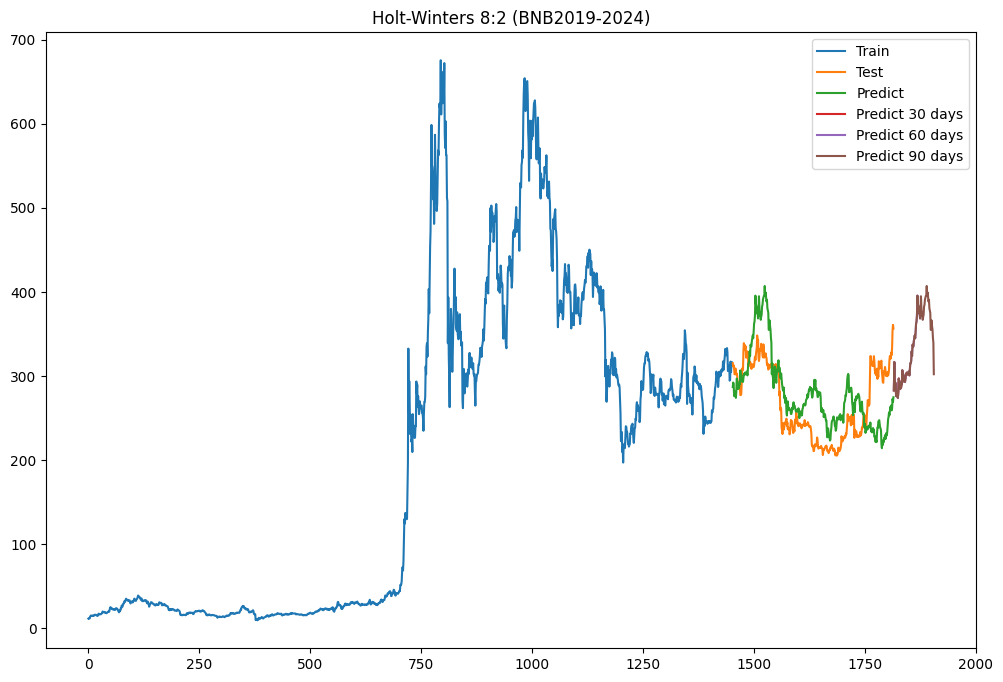

In [14]:
# Trực quan hóa kết quả
plt.figure(figsize=(12, 8))
plt.title('Holt-Winters 8:2 (BNB2019-2024)')
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(predict_test.index, predict_test, label='Predict')
plt.plot(predict_30_days.index, predict_30_days, label='Predict 30 days')
plt.plot(predict_60_days.index, predict_60_days, label='Predict 60 days')
plt.plot(predict_90_days.index, predict_90_days, label='Predict 90 days')
plt.legend(loc='best')
plt.show()